In [4]:
from app import dimension_properties, indicator_properties

In [5]:
indicator_properties

,Indicator,Description,Unit,Dimension,Impact,minYear,maxYear,Category
0,GE3,"Ratio non-CO2 emissions (CH4, N2O and F-gas) i...",Tons CO2e per Capita,Natural Capital Protection,negative,1961,2020,GE
1,SE1,Palma Ratio,Ratio,Social Inclusion,negative,1967,2020,SE
2,ME1,Total domestic material consumption (DMC) per ...,kg per constant 2005 GDP,Efficient and Sustainable Resource Use,negative,1970,2020,ME
3,GB3,"Getting paid, laws and regulations for equal g...",Score (0-100),Social Inclusion,positive,1971,2020,GB
4,GN1,Share of patent publications in environmental ...,Percent,Green Economic Opportunities,positive,1980,2020,GN
5,CV3,Share of terrestrial and marine protected area...,Percent,Natural Capital Protection,positive,1990,2020,CV
6,EE2,Renewable energy share in the total final ener...,Percent,Efficient and Sustainable Resource Use,positive,1990,2020,EE
7,GE2,"Ratio non-CO2 emissions (CH4, N2O and F-gas) e...",Tons CO2e per Capita,Natural Capital Protection,negative,1990,2020,GE
8,EE1,Energy intensity level of primary energy,Megajoules per constant 2011 purchasing power ...,Efficient and Sustainable Resource Use,negative,1990,2020,EE
9,BE2,Forest area as a proportion of total land area,Percent,Natural Capital Protection,positive,1990,2020,BE


In [1]:
import pandas as pd
from app import indicator_data, indicator_properties, data
from pages.simulation import scenario_data_dictionnary
import plotly.express as px

In [2]:
ISO = 'FRA'
data.query("ISO == @ISO")[['ISO', 'Variable', 'Aggregation', 'Year', 'Value']]

,ISO,Variable,Aggregation,Year,Value
102676,FRA,Index,Index,2005.0,65.10
102677,FRA,AB1,Indicator,2005.0,93.10
102678,FRA,AB2,Indicator,2005.0,97.50
102679,FRA,AB3,Indicator,2005.0,47.09
102680,FRA,BE1,Indicator,2005.0,59.73
...,...,...,...,...,...
104066,FRA,SP,Category,2019.0,85.42
104067,FRA,SI,Dimension,2019.0,89.31
104068,FRA,NCP,Dimension,2019.0,79.61
104069,FRA,ESRU,Dimension,2019.0,68.41


In [11]:
data

,Variable,ISO,Value,Aggregation,Year,Country,Continent,UNregion,IncomeLevel,Region,Variable_name,Continental_Rank,Income_Rank,Category,Dimension
0,AB1,AFG,NaN,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,NaN,NaN,NaN,NaN
1,AB2,AFG,18.50,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,62.0,11.0,NaN,NaN
2,AB3,AFG,2.34,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,85.0,33.0,NaN,NaN
3,BE1,AFG,0.00,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,86.0,50.0,NaN,NaN
4,BE2,AFG,2.07,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,64.0,40.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337117,SP,ZWE,41.40,Category,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Social protection,12.0,24.0,SP,Social Inclusion
337118,SI,ZWE,41.71,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Social inclusion,24.0,37.0,NaN,NaN
337119,NCP,ZWE,78.42,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Natural capital protection,1.0,1.0,NaN,NaN
337120,ESRU,ZWE,57.58,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Efficient and sustainable resource use,29.0,25.0,NaN,NaN


In [4]:
def category_heatmap(ISO):
    REF_1 = 'AVG_' + "_".join(data[data.ISO == ISO][["IncomeLevel"]
                                                    ].drop_duplicates().values[0].tolist())
    REF_2 = 'AVG_' + "_".join(data[data.ISO == ISO][["Continent"]
                                                    ].drop_duplicates().values[0].tolist())

    df = data[(data.ISO.isin([ISO, REF_1, REF_2])) &
              (data.Aggregation == 'Index')].fillna(0)
    
    return df

In [6]:
category_heatmap('FRA')

,Variable,ISO,Value,Aggregation,Year,Country,Continent,UNregion,IncomeLevel,Region,Variable_name,Continental_Rank,Income_Rank,Category,Dimension
102676,Index,FRA,65.10,Index,2005.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,12.0,12.0,0,0
102769,Index,FRA,65.66,Index,2006.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,12.0,13.0,0,0
102862,Index,FRA,65.64,Index,2007.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,14.0,14.0,0,0
102955,Index,FRA,66.74,Index,2008.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,10.0,10.0,0,0
103048,Index,FRA,66.46,Index,2009.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,10.0,10.0,0,0
103141,Index,FRA,66.83,Index,2010.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,12.0,12.0,0,0
103234,Index,FRA,67.76,Index,2011.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,12.0,12.0,0,0
103327,Index,FRA,68.00,Index,2012.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,12.0,12.0,0,0
103420,Index,FRA,67.93,Index,2013.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,13.0,13.0,0,0
103513,Index,FRA,68.22,Index,2014.0,France,Europe,Western Europe,High income,Europe & Central Asia,0,13.0,13.0,0,0


In [ ]:
    REF_1 = 'AVG_' + "_".join(data[data.ISO == ISO][["IncomeLevel"]
                                                    ].drop_duplicates().values[0].tolist())
    REF_2 = 'AVG_' + "_".join(data[data.ISO == ISO][["Continent"]
                                                    ].drop_duplicates().values[0].tolist())

In [1]:
0.8 * 3.9

3.12

In [3]:
data.loc['']

,Variable,ISO,Value,Aggregation,Year,Country,Continent,UNregion,IncomeLevel,Region,Variable_name,Continental_Rank,Income_Rank,Category,Dimension
0,AB1,AFG,NaN,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,NaN,NaN,NaN,NaN
1,AB2,AFG,18.50,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,62.0,11.0,NaN,NaN
2,AB3,AFG,2.34,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,85.0,33.0,NaN,NaN
3,BE1,AFG,0.00,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,86.0,50.0,NaN,NaN
4,BE2,AFG,2.07,Indicator,2005.0,Afghanistan,Asia,Southern Asia,Low income,South Asia,NaN,64.0,40.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337117,SP,ZWE,41.40,Category,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Social protection,12.0,24.0,SP,Social Inclusion
337118,SI,ZWE,41.71,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Social inclusion,24.0,37.0,NaN,NaN
337119,NCP,ZWE,78.42,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Natural capital protection,1.0,1.0,NaN,NaN
337120,ESRU,ZWE,57.58,Dimension,2019.0,Zimbabwe,Africa,Eastern Africa,Lower middle income,Sub-Saharan Africa,Efficient and sustainable resource use,29.0,25.0,NaN,NaN


In [155]:
import plotly.express as px


def missing_bar_plot(ISO):
    cats = ['EE', 'EW', 'SL', 'ME',
            'EQ', 'GE', 'BE', 'CV',
            'AB', 'GB', 'SE', 'SP',
            'GV', 'GT', 'GJ', 'GN']
    

    plot_df = (
        missing_data.loc[ISO].reset_index().merge(indicator_properties[['Category', "Dimension"]].drop_duplicates(), on='Category')
                    .merge(data[['Variable_name', 'Variable']].drop_duplicates(), left_on='Category', right_on='Variable')
    )
    plot_df_bis = plot_df.copy().assign(Dimension='Missing')
    plot_df_bis['Data availability (%)'] = (100 - plot_df_bis['Data availability (%)']).round(2)

    plot_df = pd.concat([plot_df, plot_df_bis])
    fig = px.bar(plot_df,
             y='Category',
             x='Data availability (%)',
             color='Dimension',
             barmode='stack',
             orientation='h',
            text='Data availability (%)',
             hover_data={'Variable_name': True, 'Dimension': False, 'Data availability (%)': False},
            labels={'Variable_name': 'Category'},
            color_discrete_map={
                           "Social Inclusion": "#d9b5c9",
                           "Natural Capital Protection": "#f7be49",
                           "Efficient and Sustainable Resource Use": "#8fd1e7",
                           "Green Economic Opportunities": "#9dcc93",
                           "Missing": '#D3D3D3'
                       },
                ).update_layout(height=1000,
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                legend=dict(
        yanchor="top",
        y=-0.05,
        xanchor="center",
        x=0,
        title=''
        
    ),
    ).update_traces(texttemplate='%{text:.2s}%', textposition='inside', textfont=dict(
        family="sans serif",
        size=18,
        color="white"
    )).update_yaxes(title="").update_xaxes(showticklabels=False)

    return fig


In [156]:
missing_bar_plot('FRA')


(dot.exe:1180): Pango-WARNING **: couldn't load font "roboto Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


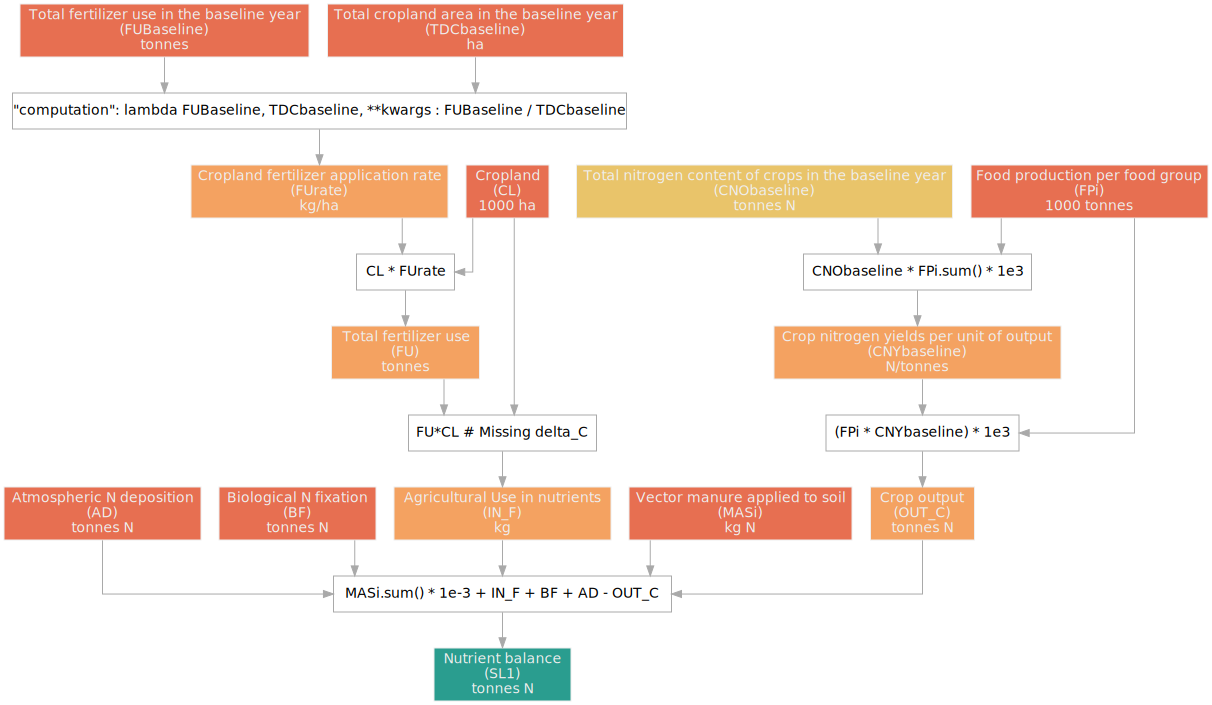

In [28]:


from ggmodel_dev.graphmodel import GraphModel
from ggmodel_dev.utils import get_model_properties
import numpy as np

NUTRIENT_nodes = {
    "AD": {
        "name": "Atmospheric N deposition",
        "type": "input",
        "unit": "tonnes N"
    },
    "BF": {
        "name": "Biological N fixation",
        "type": "input",
        "unit": "tonnes N"
    },
    "CL": {
        "name": "Cropland",
        "type": "input",
        "unit": "1000 ha"
    },
    "CNObaseline": {
        "name": "Total nitrogen content of crops in the baseline year",
        "type": "parameter",
        "unit": "tonnes N"
    },
    "CNYbaseline": {
        "name": "Crop nitrogen yields per unit of output",
        "type": "variable",
        "unit": "N/tonnes",
        "computation": lambda CNObaseline, FPi, **kwargs: CNObaseline * FPi.sum() * 1e3
    },
    "FPi": {
        "name": "Food production per food group",
        "type": "input",
        "unit": "1000 tonnes"
    },
    "FU": {
        "name": "Total fertilizer use",
        "type": "variable",
        "unit": "tonnes",
        "computation": lambda CL, FUrate, **kwargs: CL * FUrate
    },
    "FUBaseline": {
        "name": "Total fertilizer use in the baseline year",
        "type": "input",
        "unit": "tonnes"
    },
    "FUrate": {
        "name": "Cropland fertilizer application rate",
        "type": "variable",
        "unit": "kg/ha",
        "computation": lambda FUBaseline, TDCbaseline, **kwargs : FUBaseline / TDCbaseline
    },
    "IN_F": {
        "name": "Agricultural Use in nutrients",
        "type": "variable",
        "unit": "kg",
        "computation": lambda FU, CL, **kwargs: FU*CL # Missing delta_C 
    },
    "MASi": {
        "name": "Vector manure applied to soil",
        "type": "input",
        "unit": "kg N"
    },
    "OUT_C": {
        "name": "Crop output",
        "type": "variable",
        "unit": "tonnes N",
        "computation": lambda FPi, CNYbaseline, **kwargs: (FPi * CNYbaseline) * 1e3
    },
    "SL1": {
        "name": "Nutrient balance",
        "type": "output",
        "unit": "tonnes N",
        "computation": lambda MASi, IN_F, BF, AD, OUT_C, **kwargs: MASi.sum() * 1e-3 + IN_F + BF + AD - OUT_C
    },
    "TDCbaseline": {
        "name": "Total cropland area in the baseline year",
        "type": "input",
        "unit": "ha"
    }
}


NUTRIENT_model = GraphModel(NUTRIENT_nodes)

model_dictionnary = {'NUTRIENT_model': NUTRIENT_model}

model_properties = get_model_properties('models/landuse/NUTRIENT_properties.json')
NUTRIENT_model.draw()


(dot.exe:5104): Pango-WARNING **: couldn't load font "roboto Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


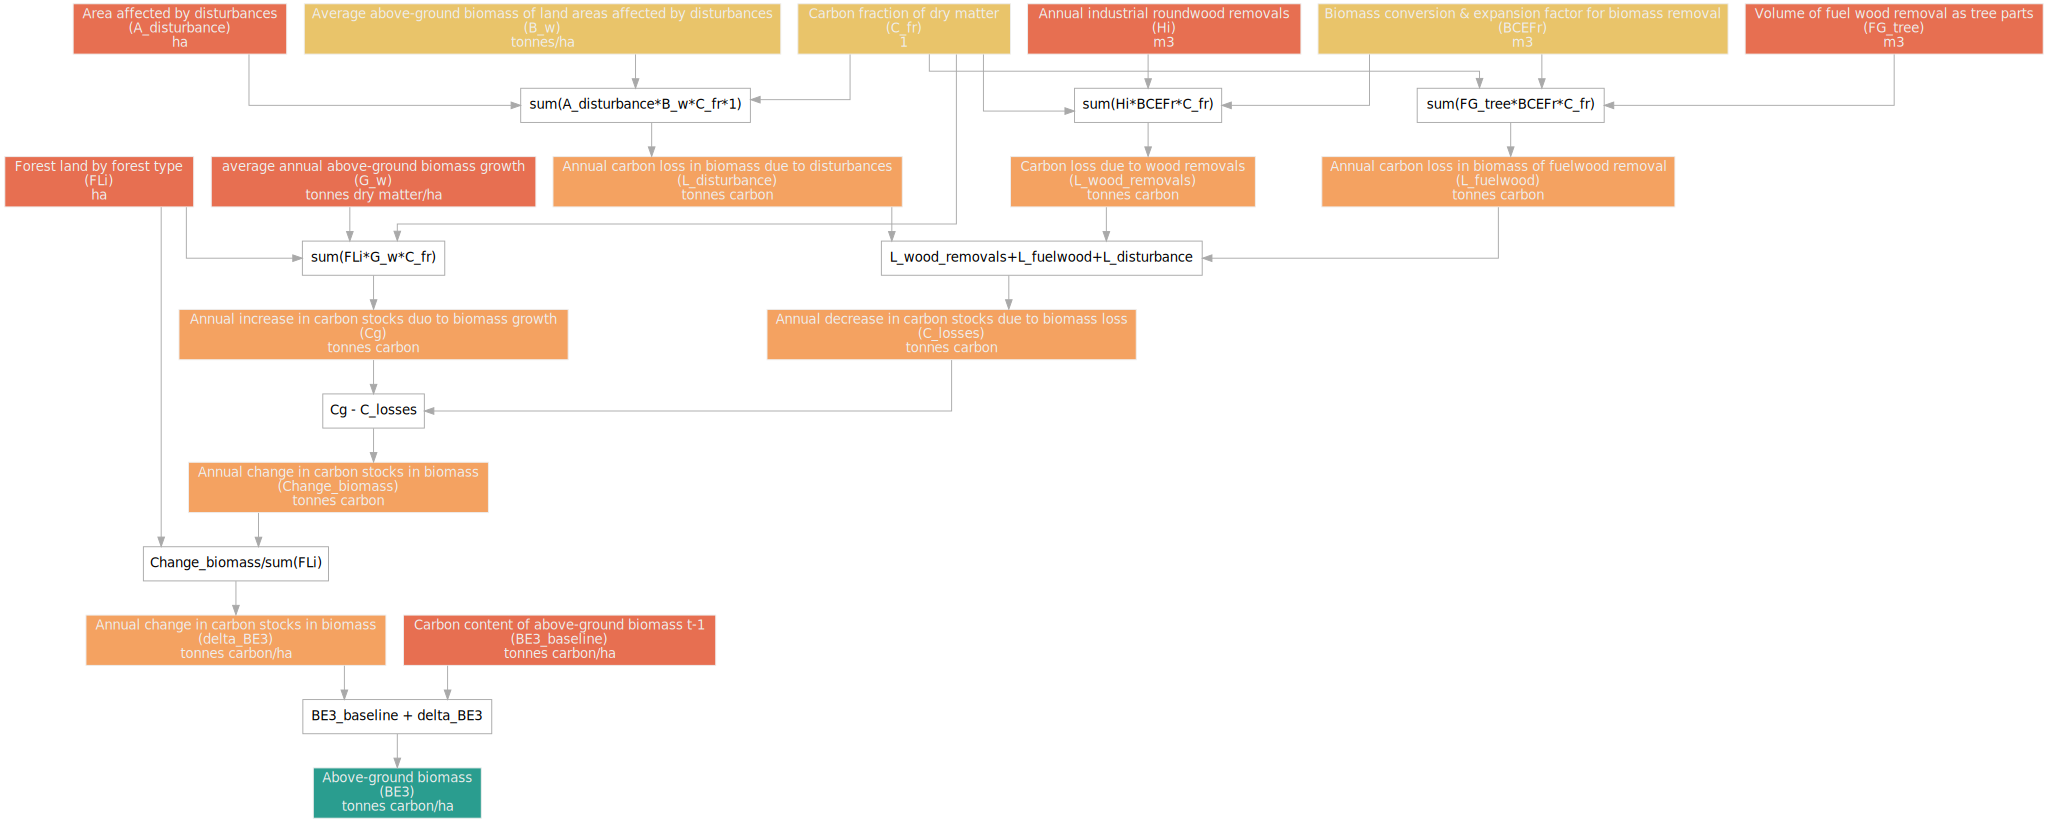

In [13]:
from ggmodel_dev.graphmodel import GraphModel
from ggmodel_dev.utils import get_model_properties


BIOMASS_nodes = {
    'C_fr': {'type': 'parameter',
              'unit': '1',
              'name': 'Carbon fraction of dry matter'},
    'G_w': {'type': 'input',
              'unit': 'tonnes dry matter/ha',
              'name': 'average annual above-ground biomass growth'},
    'Cg': {'type': 'variable',
              'name': 'Annual increase in carbon stocks duo to biomass growth',
              'unit': 'tonnes carbon',
              'computation': lambda G_w,FLi,C_fr, **kwargs: sum(FLi*G_w*C_fr)
              },  
    'FLi': {'type': 'input',
             'unit': 'ha',
             'name': 'Forest land by forest type'},
    'Hi': {'type': 'input',
              'unit': 'm3',
              'name': 'Annual industrial roundwood removals'},
    'BCEFr': {'type': 'parameter',
              'unit': 'm3',
              'name': 'Biomass conversion & expansion factor for biomass removal'},  
    'L_wood_removals': {'type': 'variable',
              'name': 'Carbon loss due to wood removals',
              'unit': 'tonnes carbon',
              'computation': lambda Hi,BCEFr,C_fr, **kwargs: sum(Hi*BCEFr*C_fr)
             },
    'L_fuelwood': {'type': 'variable',
              'name': 'Annual carbon loss in biomass of fuelwood removal',
              'unit': 'tonnes carbon',
              'computation': lambda FG_tree,BCEFr,C_fr,  **kwargs: sum(FG_tree*BCEFr*C_fr)
             },
    'FG_tree': {'type': 'input',
              'unit': 'm3',
              'name': 'Volume of fuel wood removal as tree parts'},
    'A_disturbance': {'type': 'input',
              'unit': 'ha',
              'name': 'Area affected by disturbances'},
    'B_w': {'type': 'parameter',
              'unit': 'tonnes/ha',
              'name': 'Average above-ground biomass of land areas affected by disturbances'},
    'L_disturbance': {'type': 'variable',
              'name': 'Annual carbon loss in biomass due to disturbances',
              'unit': 'tonnes carbon',
              'computation': lambda A_disturbance,B_w,C_fr, **kwargs: sum(A_disturbance*B_w*C_fr*1)
             },

    'C_losses': {'type': 'variable',
              'name': 'Annual decrease in carbon stocks due to biomass loss',
              'unit': 'tonnes carbon',
              'computation': lambda L_wood_removals,L_fuelwood,L_disturbance,  **kwargs: L_wood_removals+L_fuelwood+L_disturbance
             },

    'Change_biomass': {'type': 'variable',
              'name': 'Annual change in carbon stocks in biomass',
              'unit': 'tonnes carbon',
              'computation': lambda Cg, C_losses,  **kwargs: Cg - C_losses
             },
    'delta_BE3': {'type': 'variable',
              'name': 'Annual change in carbon stocks in biomass',
              'unit': 'tonnes carbon/ha',
              'computation': lambda Change_biomass,FLi,  **kwargs: Change_biomass/sum(FLi)
             },
    'BE3_baseline': {'type': 'input',
              'unit': 'tonnes carbon/ha',
              'name': 'Carbon content of above-ground biomass t-1'},  
    'BE3': {'type': 'output',
              'name': 'Above-ground biomass',
              'unit': 'tonnes carbon/ha',
              'computation': lambda BE3_baseline, delta_BE3,  **kwargs: BE3_baseline + delta_BE3
             },
}

BIOMASS_model = GraphModel(BIOMASS_nodes)

model_dictionnary = {'BIOMASS_model': BIOMASS_model}

model_properties = get_model_properties('models/landuse/BIOMASS_properties.json')
BIOMASS_model.draw()


(dot.exe:18288): Pango-WARNING **: couldn't load font "roboto Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


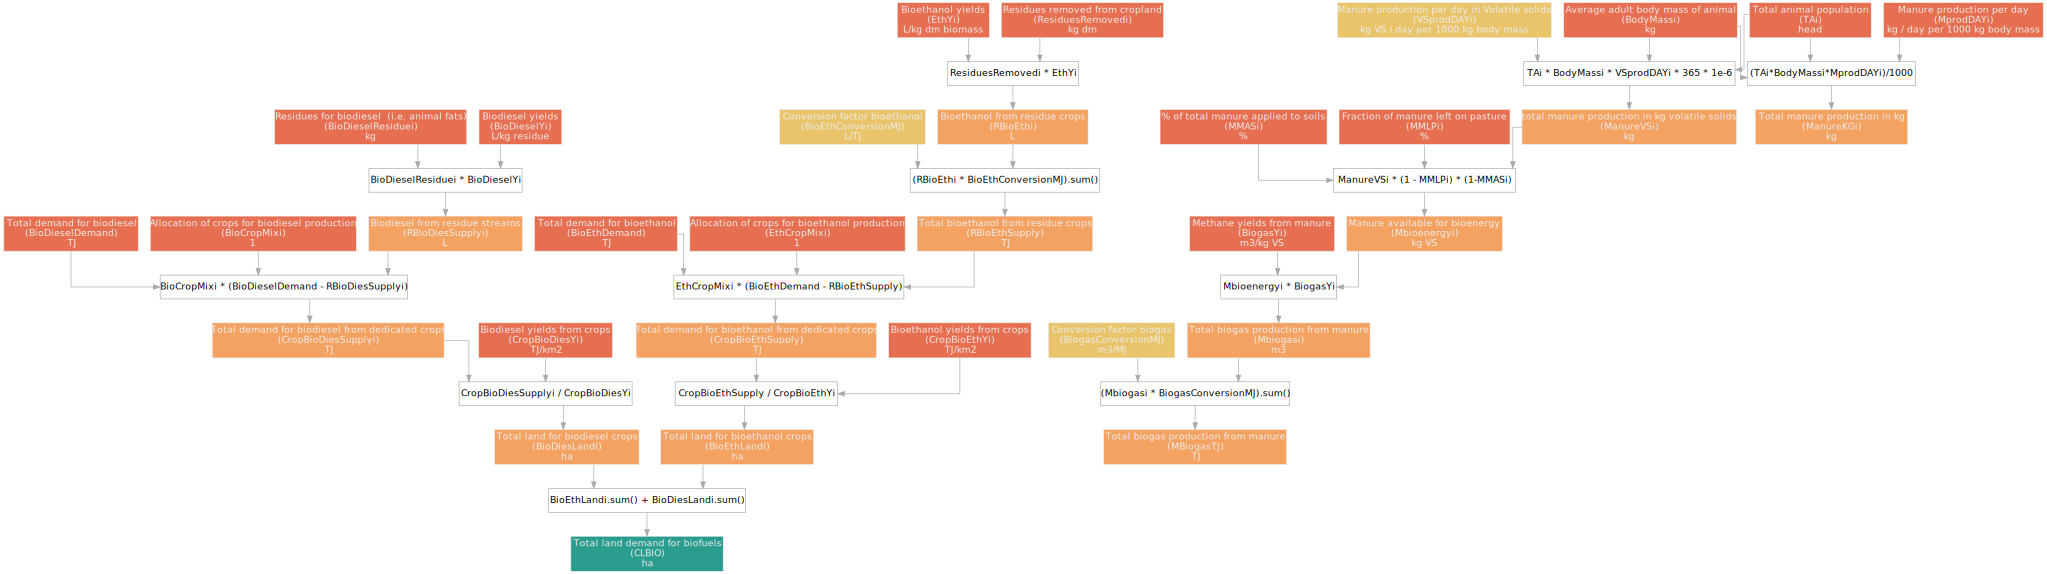

In [19]:
from ggmodel_dev.graphmodel import GraphModel
from ggmodel_dev.utils import get_model_properties


BIOGAS_nodes = {
    "BioCropMixi": {
        "name": "Allocation of crops for biodiesel production",
        "type": "input",
        "unit": "1"
    },
    "BioDiesLandi": {
        "name": "Total land for biodiesel crops",
        "type": "variable",
        "unit": "ha",
        "computation": lambda CropBioDiesSupplyi, CropBioDiesYi, **kwargs: CropBioDiesSupplyi / CropBioDiesYi
    },
    "BioDieselDemand": {
        "name": "Total demand for biodiesel",
        "type": "input",
        "unit": "TJ"
    },
    "BioDieselResiduei": {
        "name": "Residues for biodiesel  (i.e. animal fats)",
        "type": "input",
        "unit": "kg"
    },
    "BioDieselYi": {
        "name": "Biodiesel yields",
        "type": "input",
        "unit": "L/kg residue"
    },
    "BioEthConversionMJ": {
        "name": "Conversion factor bioethanol",
        "type": "parameter",
        "unit": "L/TJ"
    },
    "BioEthDemand": {
        "name": "Total demand for bioethanol",
        "type": "input",
        "unit": "TJ"
    },
    "BioEthLandi": {
        "name": "Total land for bioethanol crops",
        "type": "variable",
        "unit": "ha",
        "computation": lambda CropBioEthSupply, CropBioEthYi, **kwargs: CropBioEthSupply / CropBioEthYi
    },
    
    "BiogasConversionMJ": {
        "name": "Conversion factor biogas",
        "type": "parameter",
        "unit": "m3/MJ"
    },
    "BiogasYi": {
        "name": "Methane yields from manure",
        "type": "input",
        "unit": "m3/kg VS"
    },
    "BodyMassi": {
        "name": "Average adult body mass of animal",
        "type": "input",
        "unit": "kg"
    },
    "CLBIO": {
        "name": "Total land demand for biofuels",
        "type": "output",
        "unit": "ha",
        "computation": lambda BioEthLandi, BioDiesLandi, **kwargs: BioEthLandi.sum() + BioDiesLandi.sum()
    },
    
    "CropBioDiesSupplyi": {
        "name": "Total demand for biodiesel from dedicated crops",
        "type": "variable",
        "unit": "TJ",
        "computation": lambda BioDieselDemand, RBioDiesSupplyi, BioCropMixi, **kwargs: BioCropMixi * (BioDieselDemand - RBioDiesSupplyi)
    },
    "CropBioDiesYi": {
        "name": "Biodiesel yields from crops",
        "type": "input",
        "unit": "TJ/km2"
    },
    "CropBioEthSupply": {
        "name": "Total demand for bioethanol from dedicated crops",
        "type": "variable",
        "unit": "TJ",
        "computation": lambda BioEthDemand, RBioEthSupply, EthCropMixi, **kwargs: EthCropMixi * (BioEthDemand - RBioEthSupply)
    },
    "CropBioEthYi": {
        "name": "Bioethanol yields from crops",
        "type": "input",
        "unit": "TJ/km2"
    },
    "EthCropMixi": {
        "name": "Allocation of crops for bioethanol production",
        "type": "input",
        "unit": "1"
    },
    "EthYi": {
        "name": "Bioethanol yields",
        "type": "input",
        "unit": "L/kg dm biomass"
    },
    "MBiogasTJ": {
        "name": "Total biogas production from manure",
        "type": "variable",
        "unit": "TJ",
        "computation": lambda Mbiogasi, BiogasConversionMJ, **kwargs: (Mbiogasi * BiogasConversionMJ).sum()
    },
    "MMASi": {
        "name": "% of total manure applied to soils",
        "type": "input",
        "unit": "%"
    },
    
    "MMLPi": {
        "name": "Fraction of manure left on pasture",
        "type": "input",
        "unit": "%"
    },
    
    "ManureKGi": {
        "name": "Total manure production in kg",
        "type": "variable",
        "unit": "kg",
        "computation": lambda TAi, BodyMassi, MprodDAYi, **kwargs: (TAi*BodyMassi*MprodDAYi)/1000
    },
    "ManureVSi": {
        "name": "total manure production in kg volatile solids",
        "type": "variable",
        "unit": "kg",
        "computation": lambda TAi, BodyMassi, VSprodDAYi, **kwargs: TAi * BodyMassi * VSprodDAYi * 365 * 1e-6
    },
    "Mbioenergyi": {
        "name": "Manure available for bioenergy",
        "type": "variable",
        "unit": "kg VS",
        "computation": lambda ManureVSi, MMLPi, MMASi, **kwargs: ManureVSi * (1 - MMLPi) * (1-MMASi)
    },
    "Mbiogasi": {
        "name": "Total biogas production from manure",
        "type": "variable",
        "unit": "m3",
        'computation': lambda Mbioenergyi, BiogasYi, **kwargs: Mbioenergyi * BiogasYi
    },
    
    "MprodDAYi": {
        "name": "Manure production per day",
        "type": "input",
        "unit": "kg / day per 1000 kg body mass"
    },
    
    "RBioDiesSupplyi": {
        "name": "Biodiesel from residue streams",
        "type": "variable",
        "unit": "L",
        "computation": lambda BioDieselResiduei, BioDieselYi, **kwargs: BioDieselResiduei * BioDieselYi
    },
    "RBioEthSupply": {
        "name": "Total bioethanol from residue crops",
        "type": "variable",
        "unit": "TJ",
        "computation": lambda RBioEthi, BioEthConversionMJ, **kwargs: (RBioEthi * BioEthConversionMJ).sum()
    },
    "RBioEthi": {
        "name": "Bioethanol from residue crops",
        "type": "variable",
        "unit": "L",
        "computation": lambda ResiduesRemovedi, EthYi, **kwargs: ResiduesRemovedi * EthYi
    },
    "ResiduesRemovedi": {
        "name": "Residues removed from cropland",
        "type": "input",
        "unit": "kg dm"
    },
    "TAi": {
        "name": "Total animal population",
        "type": "input",
        "unit": "head"
    },
    "VSprodDAYi": {
        "name": "Manure production per day in Volatile solids",
        "type": "parameter",
        "unit": "kg VS / day per 1000 kg body mass"
    }
}

BIOGAS_model = GraphModel(BIOGAS_nodes)

model_dictionnary = {'BIOGAS_model': BIOGAS_model}

model_properties = get_model_properties('models/landuse/BIOGAS_properties.json')
BIOGAS_model.draw()


In [3]:


from ggmodel_dev.graphmodel import GraphModel
from ggmodel_dev.utils import get_model_properties
import numpy as np

NUTRIENT_nodes = {
    "AD": {
        "name": "Atmospheric N deposition",
        "type": "input",
        "unit": "tonnes N"
    },
    "BF": {
        "name": "Biological N fixation",
        "type": "input",
        "unit": "tonnes N"
    },
    "CL": {
        "name": "Cropland",
        "type": "input",
        "unit": "1000 ha"
    },
    "CNObaseline": {
        "name": "Total nitrogen content of crops in the baseline year",
        "type": "parameter",
        "unit": "tonnes N"
    },
    "CNYbaseline": {
        "name": "Crop nitrogen yields per unit of output",
        "type": "variable",
        "unit": "N/tonnes",
        "computation": lambda CNObaseline, FPi, **kwargs: CNObaseline * FPi.sum() * 1e3
    },
    "FPi": {
        "name": "Food production per food group",
        "type": "input",
        "unit": "1000 tonnes"
    },
    "FU": {
        "name": "Total fertilizer use",
        "type": "variable",
        "unit": "tonnes",
        "computation": lambda CL, FUrate, **kwargs: CL * FUrate
    },
    "FUBaseline": {
        "name": "Total fertilizer use in the baseline year",
        "type": "input",
        "unit": "tonnes"
    },
    "FUrate": {
        "name": "Cropland fertilizer application rate",
        "type": "variable",
        "unit": "kg/ha",
        "computation": lambda FUBaseline, TDCbaseline, **kwargs : FUBaseline / TDCbaseline
    },
    "IN_F": {
        "name": "Agricultural Use in nutrients",
        "type": "variable",
        "unit": "kg",
        "computation": lambda FU, CL, **kwargs: FU*CL # Missing delta_C 
    },
    "MASi": {
        "name": "Vector manure applied to soil",
        "type": "input",
        "unit": "kg N"
    },
    "OUT_C": {
        "name": "Crop output",
        "type": "variable",
        "unit": "tonnes N",
        "computation": lambda FPi, CNYbaseline, **kwargs: (FPi * CNYbaseline) * 1e3
    },
    "SL1": {
        "name": "Nutrient balance",
        "type": "output",
        "unit": "tonnes N",
        "computation": lambda MASi, IN_F, BF, AD, OUT_C, **kwargs: MASi.sum() * 1e-3 + IN_F + BF + AD - OUT_C
    },
    "TDCbaseline": {
        "name": "Total cropland area in the baseline year",
        "type": "input",
        "unit": "ha"
    }
}


NUTRIENT_model = GraphModel(NUTRIENT_nodes)

model_dictionnary = {'NUTRIENT_model': NUTRIENT_model}

model_properties = get_model_properties('models/landuse/NUTRIENT_properties.json')
# Create the GraphModel
NUTRIENT_model = GraphModel(NUTRIENT_nodes)

# Draw the model
graph = NUTRIENT_model.draw()

# Save the drawn model as a PDF file
graph.render('plots/graph_models/NUTRIENT_model', format='pdf')

# Optionally, display the plot
graph.view()

# # Create the GraphModel
# NUTRIENT_model = GraphModel(NUTRIENT_nodes)

# # Draw the model
# NUTRIENT_model.draw()

# # Save the drawn model as a PDF file
# NUTRIENT_model.render('plots/graph_models/NUTRIENT_model', format='pdf', engine='dot')

# # Optionally, display the plot
# NUTRIENT_model.render(view=True)



(dot.exe:31552): Pango-WARNING **: couldn't load font "roboto Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.

(dot.exe:32160): Pango-WARNING **: couldn't load font "roboto Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


'plots/graph_models\\NUTRIENT_model.pdf'

# Waste and Water use 